### DataCapstone Project:

#### inspecting and visualizing through 911 emergency calls data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df = pd.DataFrame(data = df) # creating DataFrame

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Basic Questions:

In [6]:
# what are the top 5 zip codes for 911 calls?

df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [8]:
# what are the top 5 townships for 911 calls?

df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [9]:
# how many unique title codes are there?

df['title'].nunique()

110

In [11]:
# Use lambda expression in .apply() to return Reason / Department column for every single value in col 'title'?

df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [12]:
df['Reason'].head() # reports back only the Reason / Department of all the values inside col 'title'

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [13]:
# what is the most common Reason for a 911 call based off of 'Reason' column?

df['Reason'].value_counts().head(1)

EMS    48877
Name: Reason, dtype: int64

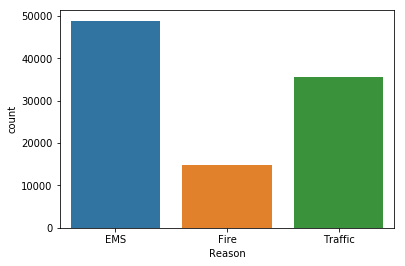

In [16]:
# Create a countplot based off of this new col 'Reason'?

sns.countplot(x = df['Reason'])

In [17]:
# What is the data type the objects in col 'timeStamp'?

# type(df['timeStamp']) # reports back the type of entire column
type(df['timeStamp'].iloc[0]) # reports back the type of entries inside column 'timeStamp' entry at index '0'

str

In [20]:
# Check out the type of col 'timeStamp'?

type(df['timeStamp'])
#type(df['timeStamp'][0]) # reports back string data type

pandas.core.series.Series

In [21]:
# Use Pandas built-in method to convert the data type of col 'timeStamp' from 'str to 'DateTime'?

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [22]:
type(df['timeStamp'][0]) # reports back the objects inside are of data type 'DateTime'

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
time = df['timeStamp'].iloc[0] # '0' indexed value in col 'timeStamp'

In [24]:
# we can call differerent attributes off of this time variable to see the results
# for example
# for hours

time.hour

17

In [25]:
# for days in month

time.days_in_month

# etc

31

In [26]:
# Create 3 colums, 'Hour', 'Month', 'Day of Week' based off of the 'timeStamp' column

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [27]:
df['Hour'].head()

0    17
1    17
2    17
3    17
4    17
Name: Hour, dtype: int64

In [28]:
# similarly for the rest of two..

df['Month'] = df['timeStamp'].apply(lambda time: time.month)

In [29]:
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [30]:
# and finally for 'Day of Week'

df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [31]:
df['Day of Week'].head()

0    3
1    3
2    3
3    3
4    3
Name: Day of Week, dtype: int64

In [32]:
# check out the DataFrame and see if it has newly added columns?

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [33]:
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [34]:
df['Day of Week'].head()

0    3
1    3
2    3
3    3
4    3
Name: Day of Week, dtype: int64

In [35]:
time = df['timeStamp'].iloc[0]
time.dayofweek

3

In [36]:
# Map the dictionary with week day names to the col 'Day of Week'?

dmap = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [37]:
df['Day of Week'].head()

0    3
1    3
2    3
3    3
4    3
Name: Day of Week, dtype: int64

In [38]:
# Map the dictionary with week day names to the col 'Day of Week'?

dmap = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

df['Day of Week'] = df['Day of Week'].map(dmap)
df['Day of Week'].head()

0    Thursday
1    Thursday
2    Thursday
3    Thursday
4    Thursday
Name: Day of Week, dtype: object

In [39]:
# sns.countplot(x = 'Day of Week', data = df)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday


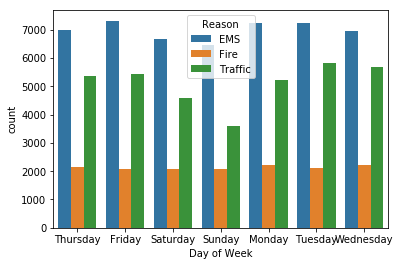

In [40]:
# hue seperation on column -> 'Reason'
# countplot on column 'Day of Week'

sns.countplot(x = 'Day of Week', data = df, hue = df['Reason'])

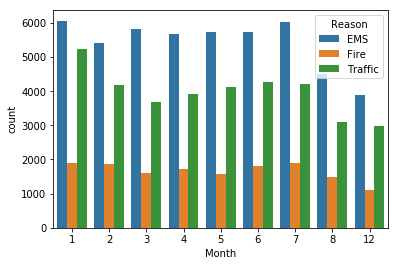

In [41]:
# hue seperation on col 'Reason'
# countplot() on col 'Month'

sns.countplot(x = 'Month', hue = 'Reason', data = df)

# notice we are missing some values of months on X-axis

In [42]:
# Create the object 'by_month' using groupby method and use count() for aggregation. Use the head()
# on the returned DataFrame

byMonth = df.groupby('Month').count()

# it actually counts every instance of every column by month

In [43]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


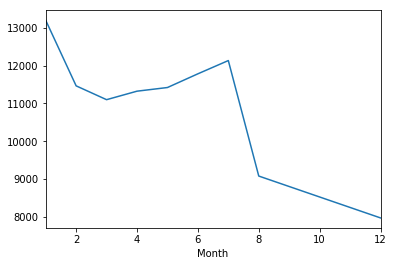

In [44]:
# Create simple plot of various columns determining the counts / column
# in this case we have column --> latitute
byMonth['lat'].plot()

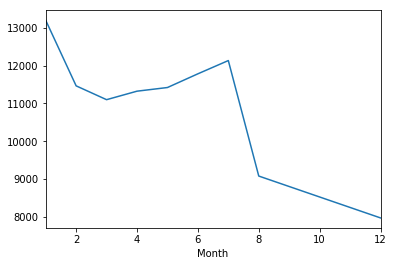

In [45]:
byMonth['lng'].plot()

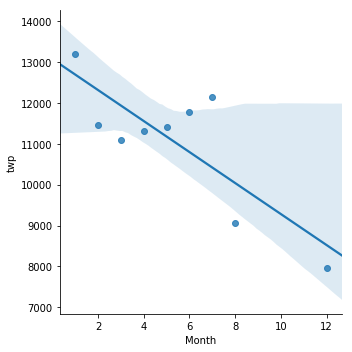

In [46]:
# Creata a regression plot off of seaborn to show linear fit on the number of calls / month?

sns.lmplot(x = 'Month', y = 'twp', data = byMonth.reset_index())

# in order to pass data = byMonth, we need to change 'Month' column as index value
# otherwise seaborn would find erros in our code

In [47]:
byMonth # Month column as index

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [48]:
byMonth.reset_index() # sets month as column and be able to read for seaborn

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [49]:
# Create Date column off of 'timeStamp' col

df['Date'] = df['timeStamp'].apply(lambda time: time.date())

In [50]:
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

In [51]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10


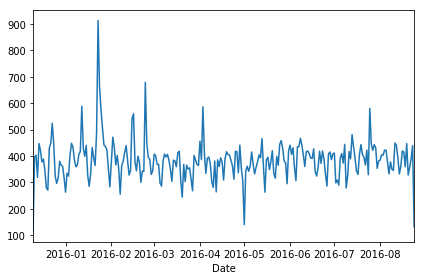

In [57]:
# plotting counts of 911 calls

byDate = df.groupby('Date').count()['lat'].plot()

plt.tight_layout()

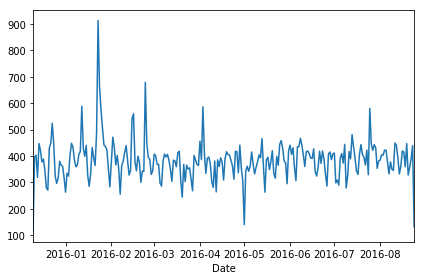

In [56]:
df.groupby('Date').count()['lng'].plot()
plt.tight_layout()

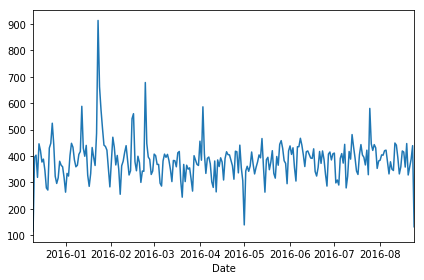

In [55]:
# similarly for col 'twp' we have..

df.groupby('Date').count()['twp'].plot()

# in order to avoid overlapping we can use the following method

plt.tight_layout()

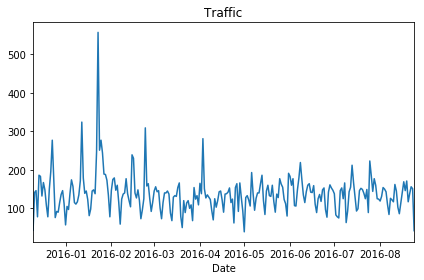

In [60]:
# Create the plots for Reason column using different column values one by one
# for example for Traffic, plot that shows only traffice entries data, same for other two as well

df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

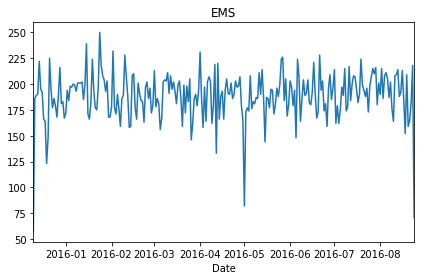

In [62]:
# similarly for other two entries we have

df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

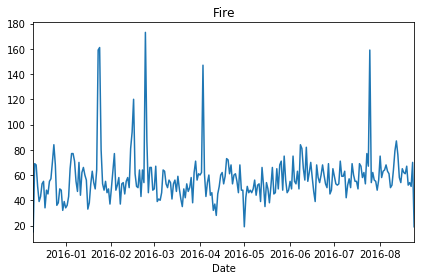

In [68]:
# for Fire entry

df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

In [84]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10


In [100]:
# Restructure the DataFrame so that columns becomes the Hours, and the index becomes the 'Day of Weeks',
# using unstack() of of our DataFrame

dayHour = df.groupby(['Day of Week', 'Hour']).count()['Reason'].unstack()

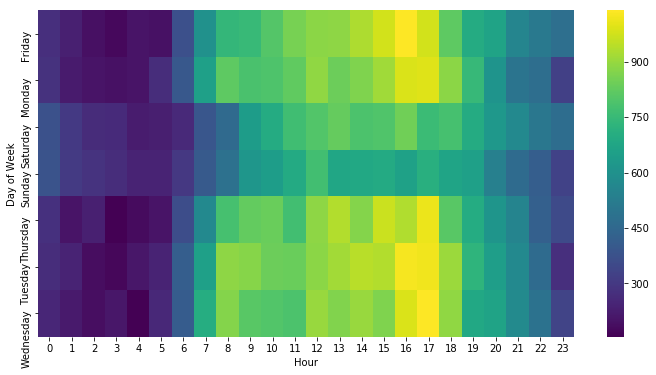

In [107]:
# Create Heatmap using this new DataFrame

plt.figure(figsize = (12,6))
sns.heatmap(data = dayHour, cmap = 'viridis')

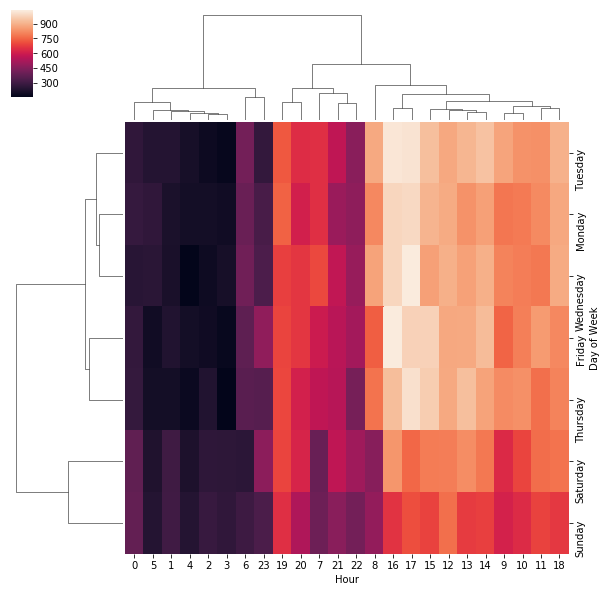

In [108]:
# Create a clustermap of this new DataFrame

sns.clustermap(data = dayHour)

In [111]:
# Repeat the same plots and operations for a DataFrame that shows the 'Month' as the column

dayMonth = df.groupby(['Day of Week', 'Month']).count()['Reason'].unstack()

In [113]:
dayMonth.head() # reports back the counts for Reason column with grouped by col 'Month' and col 'Day of Week'

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266


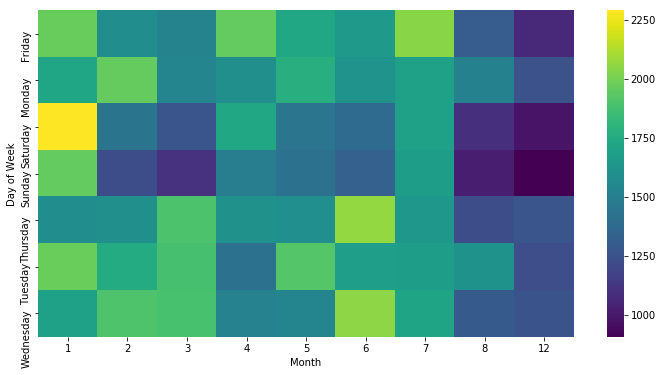

In [116]:
plt.figure(figsize = (12,6))
sns.heatmap(data = dayMonth, cmap = 'viridis')

<Figure size 864x432 with 0 Axes>

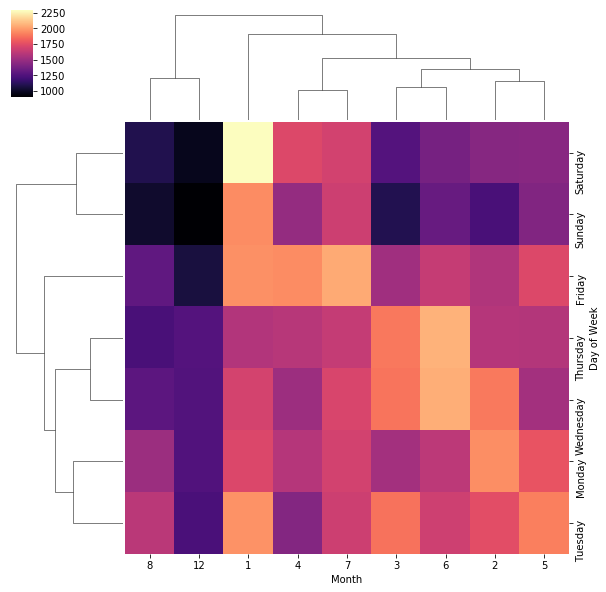

In [119]:
plt.figure(figsize = (12,6))
sns.clustermap(data = dayMonth, cmap = 'magma')

In [121]:
# Thats all for the 911 Emergency calls Data Wrangling and Visualization project
# Hope you enjoyed it :)
# Created_by: UmairGillani (UG_PYTHON)
# Email: umairgillani93@gmail.com